<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/6/6f/Dauphine_logo_2019_-_Bleu.png" style="width: 600px;"/> 
</center>

# Partie 1 : Indicateur de probabilité de récession USA

# I - Données et librairies
### I.1 - Importation des librairies et de la base de données

Nous commençons par installer et importer toutes les librairies dont nous aurons besoin pour ce projet

In [ ]:
# À ne lancer uniquement si vous ne disposez pas de toutes les librairies
#! pip install seaborn
#! pip install matplotlib
#! pip install statsmodels

In [1]:
# Importation des librairies
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import warnings

Importation de la base de données constituée de la variable à expliquer, soit l'indicateur des récession et de cinq variables explicatives choisies : **NFP Index, ISM Manufacturing Index, CLI Index USA, Uncertainty Index USA, Spread 10Y-3M**. Les données sont **trimestrielles**.

In [3]:
excelDataUS = pd.read_excel("../data/Data_Recession_USA.xlsx", index_col=0)

Affichage du tableau de données

In [5]:
excelDataUS.head()

,Recession Indicator,NFP Index,ISM Manufacturing Index,CLI Index,Uncertainty Index USA,Spread 10Y-3M
Dates,,,,,,
2000-03-31,0,131604,54.9,101.20840,73.298624,0.17
2000-06-30,0,132060,51.4,100.77630,109.584229,-0.09
2000-09-29,0,132357,49.7,100.12470,73.550992,-0.55
2000-12-29,1,132718,43.9,99.10502,149.448500,-0.13
2001-03-30,1,132751,43.1,98.34007,137.374157,1.17


In [6]:
recessionDataUS = excelDataUS["Recession Indicator"]
nfpDataUS = excelDataUS["NFP Index"]
ismDataUS = excelDataUS["ISM Manufacturing Index"]
cliDataUS = excelDataUS["CLI Index"]
uncertaintyDataUS = excelDataUS["Uncertainty Index USA"]
spreadDataUS = excelDataUS["Spread 10Y-3M"]
dataListUS = [recessionDataUS, nfpDataUS, ismDataUS, cliDataUS, uncertaintyDataUS, spreadDataUS]

### I.2 - Visualisation des données

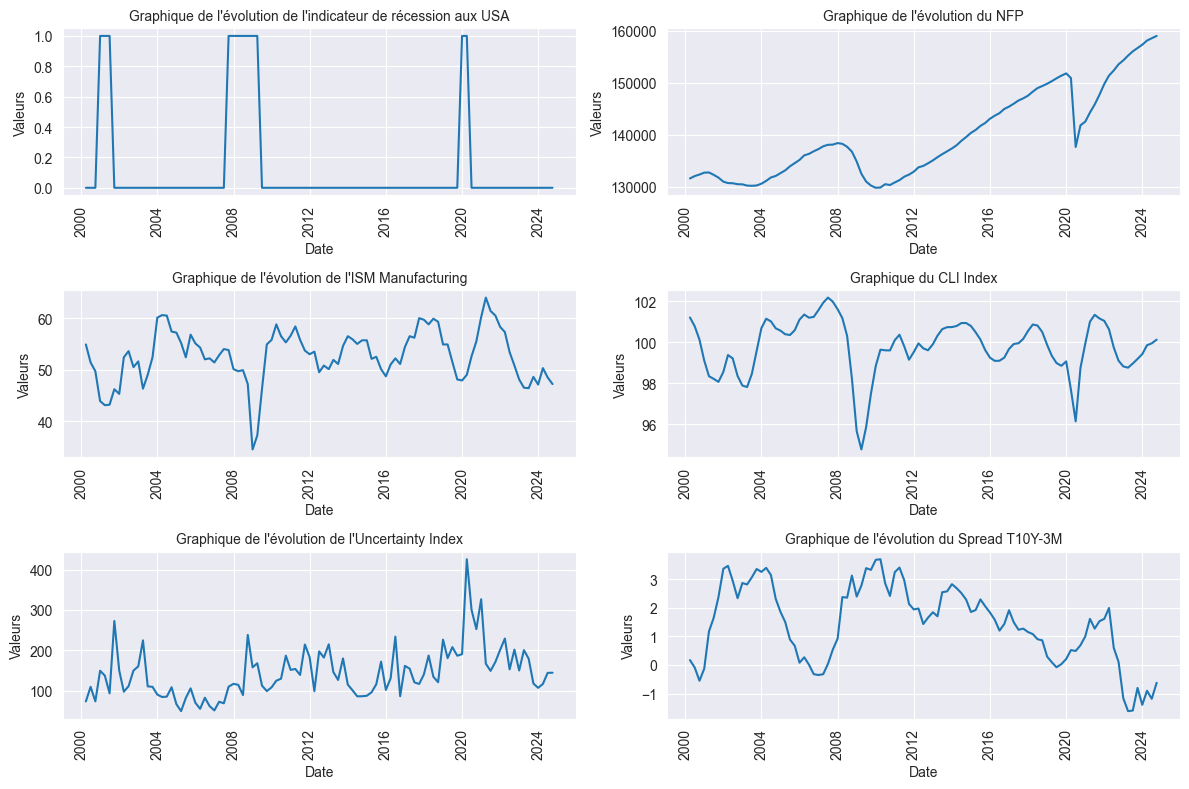

In [8]:
# Ajout d'un fond aux graphiques
sb.set_style("darkgrid")

# Creation d'une grille 3x2
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

# Liste des titres des graphiques
titles = ["Graphique de l'évolution de l'indicateur de récession aux USA", "Graphique de l'évolution du NFP", 
          "Graphique de l'évolution de l'ISM Manufacturing", "Graphique du CLI Index", 
          "Graphique de l'évolution de l'Uncertainty Index", "Graphique de l'évolution du Spread T10Y-3M"]

# Boucle pour afficher les graphiques
for i, (ax, data, title) in enumerate(zip(axes.flatten(), dataListUS, titles)):
    # Enregistrement des données
    x = data.index
    y = data.values
    # Construction du graphique
    ax.plot(x, y)
    # Ajout de titres
    ax.set_xlabel("Date")
    ax.set_ylabel("Valeurs")
    ax.set_title(title, fontsize=10)
    ax.tick_params(axis='x', rotation=90)
# Affichage des graphiques
plt.tight_layout()
plt.show()

Les données sont toutes trimestrielles, couvrant chaque indicateur du **premier trimestre 1997 au troisième trimestre 2024**. Certaines semblent osciller autour de tendances, comme c’est le cas pour les Non-Farm Payrolls et l'Uncertainty Index. Plusieurs séries partagent une caractéristique commune : des **variations extrêmes**, avec de forts pics en **2000, 2008 et 2020**, correspondant respectivement **à la bulle internet, à la crise des subprimes et à la pandémie de Covid-19**. Une première visualisation nous donne un aperçu de la stationnarité de chaque série, qui sera ensuite analysée par des tests plus approfondis.

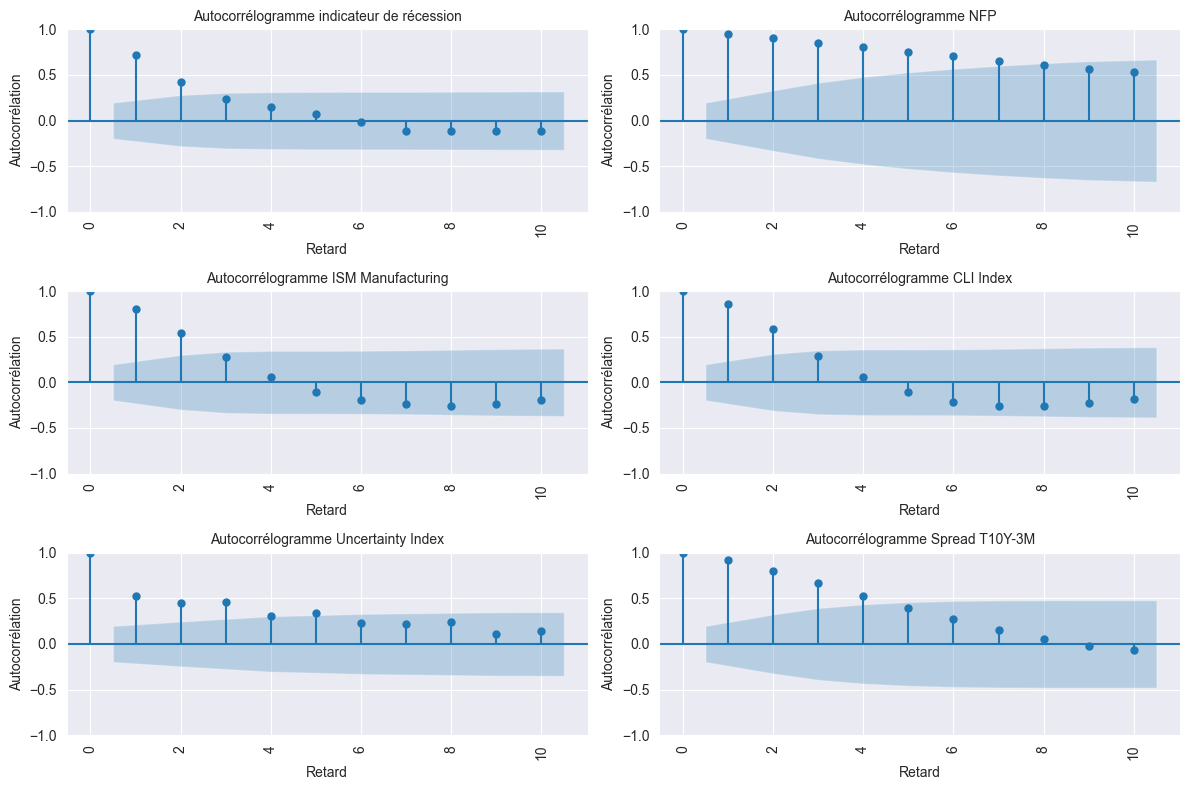

In [10]:
# Creation d'une grille 3x2
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

# Liste des titres des graphiques
titles = ["Autocorrélogramme indicateur de récession", "Autocorrélogramme NFP", 
          "Autocorrélogramme ISM Manufacturing", "Autocorrélogramme CLI Index", 
          "Autocorrélogramme Uncertainty Index", "Autocorrélogramme Spread T10Y-3M"]

# Boucle pour afficher les graphiques
for i, (ax, data, title) in enumerate(zip(axes.flatten(), dataListUS, titles)):
    # Construction de l'autocorrélogramme
    plot_acf(data, lags=10, ax=ax)
    # Ajout de titres
    ax.set_xlabel("Retard")
    ax.set_ylabel("Autocorrélation")
    ax.set_title(title, fontsize=10)
    ax.tick_params(axis='x', rotation=90)
# Affichage des graphiques
plt.tight_layout()
plt.show()

La plupart des autocorrélations $\hat{ρ}$ (ACF) décroissent à un rythme **rapide**.

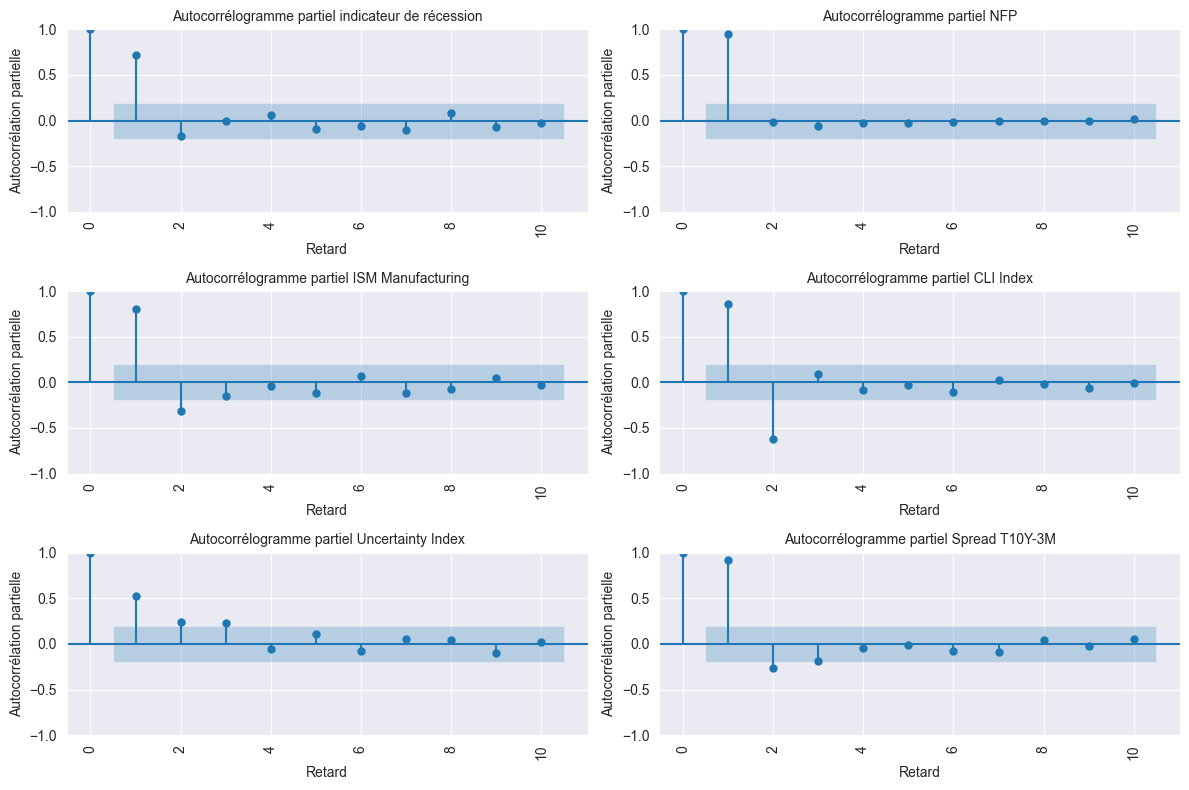

In [12]:
# Creation d'une grille 3x2
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

# Liste des titres des graphiques
titles = ["Autocorrélogramme partiel indicateur de récession", "Autocorrélogramme partiel NFP", 
          "Autocorrélogramme partiel ISM Manufacturing", "Autocorrélogramme partiel CLI Index", 
          "Autocorrélogramme partiel Uncertainty Index", "Autocorrélogramme partiel Spread T10Y-3M"]

# Boucle pour afficher les graphiques
for i, (ax, data, title) in enumerate(zip(axes.flatten(), dataListUS, titles)):
    # Construction de l'autocorrélogramme partiel
    plot_pacf(data, lags=10, method="ywm", ax=ax)
    # Ajout de titres
    ax.set_xlabel("Retard")
    ax.set_ylabel("Autocorrélation partielle")
    ax.set_title(title, fontsize=10)
    ax.tick_params(axis='x', rotation=90)
# Affichage des graphiques
plt.tight_layout()
plt.show()

Les autocorrélations partielles $\hat{r}$ (PACF) sont **significatives pour les deux premiers ordres**. La première
autocorrélation $\hat{r}_1$ partielle est très proche de 1. **Au-delà du 2ème rang, elles sont très proches 0**.

# II - Stationnarité des variables explicatives
### II.1 - Test de racine unitaire : Stratégie de tests séquentielle avec ADF

La **stationnarité** des variables est **essentielle** avant d'estimer les prévisions de notre modèle Probit (les prévisions des variables explicatives se font via ARIMA), car elle assure que les relations entre les variables demeurent constantes dans le temps, **évitant ainsi des biais dans les estimations**. En outre, une non-stationnarité pourrait introduire des tendances artificielles, **faussant ainsi les probabilités prévues par le modèle**.

**La variable à expliquer est, par construction, stationnaire**. Il s'agit d'une variable indicatrice qui prend deux valeurs : 1 en cas de récession, 0 sinon. Pour le reste des variables, nous réalisons le **test de Dickey-Fuller augmenté** sur chacune des variables. Le **nombre de retards optimal** sera sélectionné selon le **critère d’Akaike** et tous les autres paramètres sont laissés par défaut. Pour chaque variable, nous effectuons le test ADF selon 3 spécifications :
* Processus avec tendance déterministe et constante
* Processus avec constante (sans tendance déterministe)
* Processus sans tendance déterministe et sans constante

In [18]:
# Fonction pour afficher les résultats du test ADF
def display_adf_results(data, label, regression_type):
    result = adfuller(data, maxlag=None, regression=regression_type, autolag='AIC', store=False, regresults=False)
    print(f"Results for {label} :")
    print("-" * 40)
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("\n")

Pour chaque série, nous disposons de **99 observations**, les seuils critiques sont à chercher dans la **table de Dickey-Fuller** pour le modèle spécifié :
* Processus avec tendance déterministe et constante
| 𝛼      | 1%   | 5%   | 10%  |
|--------|------|------|------|
| N = 100| -4.04 | -3.45 | -3.15 |
* Processus avec constante (sans tendance déterministe)
| 𝛼      | 1%   | 5%   | 10%  |
|--------|------|------|------|
| N = 100| -3.51 | -2.89 | -2.58 |
* Processus sans tendance déterministe et sans constante
| 𝛼      | 1%   | 5%   | 10%  |
|--------|------|------|------|
| N = 100| -2.60 | -1.95 | -1.61 |

In [23]:
display_adf_results(nfpDataUS, "NFP - Processus avec tendance déterministe et constante", 'ct')
display_adf_results(nfpDataUS, "NFP - Processus avec constante (sans tendance déterministe)", 'c')
display_adf_results(nfpDataUS, "NFP - Processus sans tendance déterministe et sans constante", 'n')

Results for NFP - Processus avec tendance déterministe et constante :
----------------------------------------
ADF Statistic: -1.7339
p-value: 0.7357


Results for NFP - Processus avec constante (sans tendance déterministe) :
----------------------------------------
ADF Statistic: 0.2589
p-value: 0.9754


Results for NFP - Processus sans tendance déterministe et sans constante :
----------------------------------------
ADF Statistic: 1.7652
p-value: 0.9819




La statistique de test $t_{ADF}$ est supérieure aux seuils critiques pour 𝛼 = 1%, 5% et 10% donc nous ne rejetons pas
l’hypothèse nulle de racine unitaire $𝐻_0: 𝜌 = 0$. **La série NFP est non-stationnaire**.

In [25]:
display_adf_results(ismDataUS, "ISM Manufacturing - Processus avec tendance déterministe et constante ", 'ct')

Results for ISM Manufacturing - Processus avec tendance déterministe et constante  :
----------------------------------------
ADF Statistic: -3.6177
p-value: 0.0284




La statistique de test $t_{ADF}$ est inférieure aux seuils critiques pour 𝛼 = 1%, 5% et 10% pour le premier processus donc nous rejetons l’hypothèse nulle de racine unitaire $𝐻_0: 𝜌 = 0$. **La série ISM est stationnaire** autour d'une tendance déterministe avec une constante. Il n'est pas nécessaire d'étudier les deux autres processus.

In [28]:
display_adf_results(cliDataUS, "CLI - Processus avec tendance déterministe et constante ", 'ct')

Results for CLI - Processus avec tendance déterministe et constante  :
----------------------------------------
ADF Statistic: -5.4559
p-value: 0.0000




La statistique de test $t_{ADF}$ est inférieure aux seuils critiques pour 𝛼 = 1%, 5% et 10% pour le premier processus donc nous rejetons l’hypothèse nulle de racine unitaire $𝐻_0: 𝜌 = 0$. **La série CLI est stationnaire** autour d'une tendance déterministe avec une constante. Il n'est pas nécessaire d'étudier les deux autres processus.

In [30]:
display_adf_results(uncertaintyDataUS, "Uncertainty - Processus avec tendance déterministe et constante ", 'ct')
display_adf_results(uncertaintyDataUS, "Uncertainty - Processus avec constante (sans tendance déterministe)", 'c')
display_adf_results(uncertaintyDataUS, "Uncertainty - Processus sans tendance déterministe et sans constante ", 'n')

Results for Uncertainty - Processus avec tendance déterministe et constante  :
----------------------------------------
ADF Statistic: -3.0484
p-value: 0.1190


Results for Uncertainty - Processus avec constante (sans tendance déterministe) :
----------------------------------------
ADF Statistic: -2.8128
p-value: 0.0565


Results for Uncertainty - Processus sans tendance déterministe et sans constante  :
----------------------------------------
ADF Statistic: -0.7198
p-value: 0.4043




La statistique de test $t_{ADF}$ est supérieure aux seuils critiques pour 𝛼 = 1% et 5% pour le premier processus, elle est très proche du seuil à 5% pour le deuxième processus, et au dessus de tous les seuils pour le troisième processus donc nous ne rejetons pas l’hypothèse nulle de racine unitaire $𝐻_0: 𝜌 = 0$. Dans le doute, nous considérerons que **la série Uncertainty est non-stationnaire**.

In [33]:
display_adf_results(spreadDataUS, "Spread 10Y-3M - Processus avec tendance déterministe et constante ", 'ct')
display_adf_results(spreadDataUS, "Spread 10Y-3M - Processus avec constante (sans tendance déterministe)", 'c')
display_adf_results(spreadDataUS, "Spread 10Y-3M - Processus sans tendance déterministe et sans constante ", 'n')

Results for Spread 10Y-3M - Processus avec tendance déterministe et constante  :
----------------------------------------
ADF Statistic: -3.8530
p-value: 0.0141


Results for Spread 10Y-3M - Processus avec constante (sans tendance déterministe) :
----------------------------------------
ADF Statistic: -2.8741
p-value: 0.0484


Results for Spread 10Y-3M - Processus sans tendance déterministe et sans constante  :
----------------------------------------
ADF Statistic: -1.7557
p-value: 0.0751




La statistique de test $t_{ADF}$ est supérieure aux seuils critiques pour 𝛼 = 1%, 5% et 10% pour le premier processus, elle est très proche du seuil à 5% pour le deuxième processus et le troisième processus donc nous ne rejetons pas l’hypothèse nulle de racine unitaire $𝐻_0: 𝜌 = 0$. Dans le doute, nous considérerons que **la série Uncertainty est non-stationnaire**.

### II.2 - Stationnarisation des séries

Pour les séries non stationnaires, nous calculons leur **différence première** autant de fois que nécessaire pour les rendre **I(0)**. Cette opération réduit la taille de notre échantillon, donc nous tronquons également les séries déjà stationnaires afin qu’elles aient toutes les mêmes dimensions.

In [39]:
nfpDataUSStationary = nfpDataUS.diff().dropna()
ismDataUSStationary = ismDataUS[1:]
cliDataUSStationary = cliDataUS.diff().dropna()
uncertaintyDataUSStationary = uncertaintyDataUS.diff().dropna()
spreadDataUSStationary = spreadDataUS.diff().dropna()

# III - Modèle Probit : Indicateur de probabilité de récession
### III.1 - Construction du modèle

In [47]:
# Construction d'un nouveau DataFrame avec nos données stationnaires
X = pd.DataFrame({
    'NFP': nfpDataUSStationary,
    'ISM': ismDataUSStationary,
    'CLI' : cliDataUSStationary,
    'Uncertainty' : uncertaintyDataUSStationary,
    'Spread' : spreadDataUSStationary})

# Ajout d'une constante à X puisque la fonction Probit n'en a pas par défaut
X = sm.add_constant(X)

# Variable dépendante
y = recessionDataUS[1:]

# Ajustement du modèle Probit
model = sm.Probit(y, X)
result = model.fit()
predictions = result.predict(X)
# Affichage des résultats du modèle
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.122640
         Iterations 9
                           Probit Regression Results                           
Dep. Variable:     Recession Indicator   No. Observations:                   98
Model:                          Probit   Df Residuals:                       92
Method:                            MLE   Df Model:                            5
Date:                 Thu, 02 Jan 2025   Pseudo R-squ.:                  0.6701
Time:                         18:55:06   Log-Likelihood:                -12.019
converged:                        True   LL-Null:                       -36.434
Covariance Type:             nonrobust   LLR p-value:                 2.403e-09
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.5994      4.625      1.427      0.154      -2.465      15.664
NFP             0.

### III.2 - Affichage des résultats

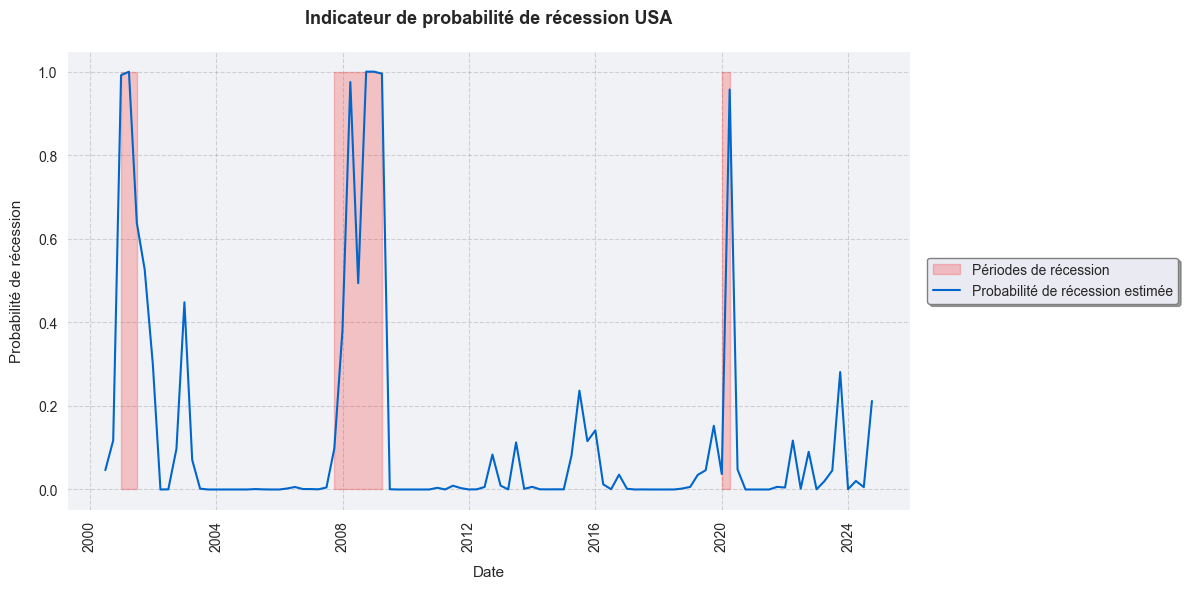

In [50]:
# Configuration du style
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

# Création de la figure avec des marges ajustées
fig, ax = plt.subplots(figsize=(12, 6))

# Affichage des périodes de récession
ax.fill_between(recessionDataUS[1:].index, 0, 1, where=(recessionDataUS[1:] == 1), 
                color='red', alpha=0.2, label='Périodes de récession')

# Ajout des probabilités de récession estimées
ax.plot(recessionDataUS[1:].index, predictions, 
        label='Probabilité de récession estimée', color='#0066CC', linewidth=1.5)

# Ajout de titres
ax.set_title('Indicateur de probabilité de récession USA', pad=20, fontsize=13, fontweight='bold')
ax.set_xlabel('Date', fontsize=11, labelpad=10)
ax.set_ylabel('Probabilité de récession', fontsize=11, labelpad=10)
ax.tick_params(axis='x', rotation=90)

# Ajout d'un fond
ax.set_facecolor('#F0F2F6')
ax.grid(True, linestyle='--', alpha=0.3, color='gray')

# Ajout d'une légende
ax.legend(bbox_to_anchor=(1.02, 0.5), loc="center left", borderaxespad=0, fontsize=10,
         frameon=True, fancybox=True, edgecolor='gray', shadow=True)

# Affichage du graphique
plt.tight_layout()
plt.show()

### III.3 - Prédictions du modèle pour 2025

In [53]:
warnings.filterwarnings('ignore', 'No frequency information was provided')

# Fonction réalisant des prévisions ARIMA pour chaque variable explicative
def forecast_variables(X, periods=4):
    forecasts = {}
    
    # Pour chaque variable (sauf la constante)
    for column in X.columns[1:]: 
        # Ajustement du modèle ARIMA
        model = ARIMA(X[column], order=(1,0,1))
        results = model.fit()
        # Réalisation des prévisions
        forecast = results.forecast(steps=periods)
        forecasts[column] = forecast
    
    # Création d'un DataFrame avec les prévisions
    forecast_df = pd.DataFrame(forecasts)
    # Ajout de la constante
    forecast_df.insert(0, 'const', 1.0)
    
    return forecast_df

# Fonction utilisant les prévisions des variables explicatives pour prédire la probabilité de récession
def make_recession_predictions(probit_model, forecast_df):
    return probit_model.predict(forecast_df)

# Réalisation des prévisions pour les variables explicatives
forecast_X = forecast_variables(X, periods=4)

# Utilisation des prévisions dans le modèle Probit
recession_probabilities = make_recession_predictions(result, forecast_X)

# Création d'un DataFrame pour afficher les résultats
forecast_dates = pd.date_range(start=X.index[-1], periods=5, freq='Q')[1:]  # Ajustez selon vos dates
forecast_results = pd.DataFrame({'Recession_Probability': recession_probabilities})

# Affichage des résultats
print("\nPrévisions de probabilité de récession pour les 4 prochains trimestres :")
print(forecast_results)


Prévisions de probabilité de récession pour les 4 prochains trimestres :
            Recession_Probability
2024-12-31               0.029633
2025-03-31               0.031420
2025-06-30               0.023723
2025-09-30               0.017899


C:\Users\nnayr\AppData\Local\Temp\ipykernel_12408\3157971980.py:34: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_dates = pd.date_range(start=X.index[-1], periods=5, freq='Q')[1:]  # Ajustez selon vos dates


C:\Users\nnayr\AppData\Local\Temp\ipykernel_12408\2324455790.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_value = predictions[-1]
C:\Users\nnayr\AppData\Local\Temp\ipykernel_12408\2324455790.py:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_dates_new = pd.date_range(start=last_date, periods=5, freq='Q')


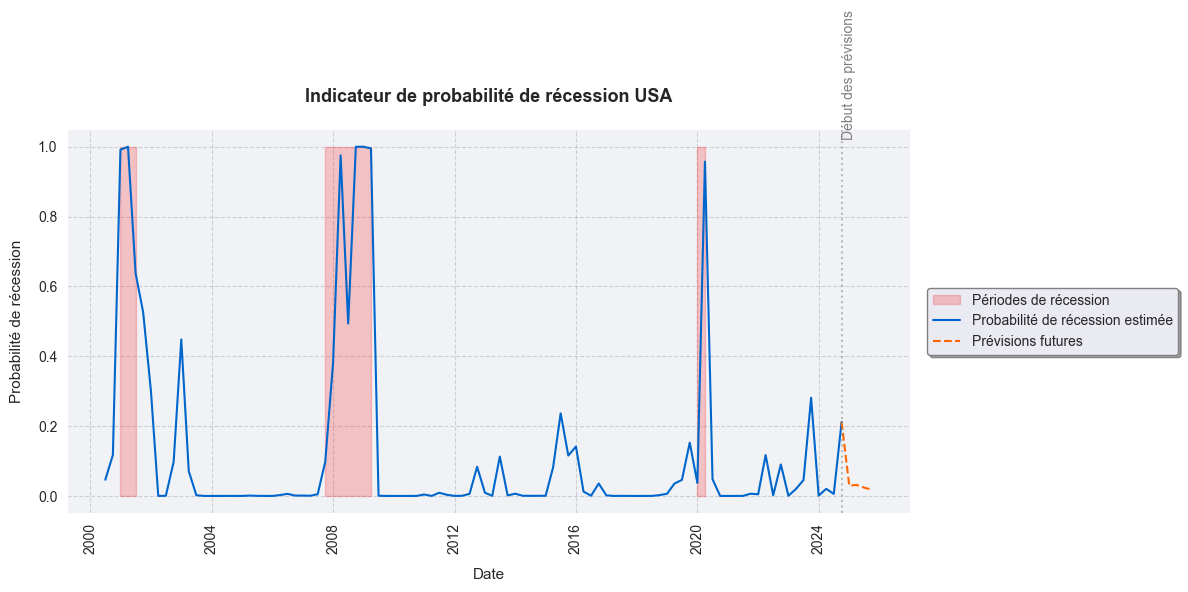

In [54]:
# Récupération de la dernière date et de la dernière valeur des prédictions historiques
last_date = recessionDataUS[1:].index[-1]
last_value = predictions[-1]

# Création du DataFrame pour les prévisions en commençant par le dernier point historique
forecast_dates_new = pd.date_range(start=last_date, periods=5, freq='Q')
forecast_results_new = np.concatenate(([last_value], recession_probabilities))

# Configuration du style
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

# Création de la figure avec des marges ajustées
fig, ax = plt.subplots(figsize=(12, 6))

# Affichage des périodes de récession
ax.fill_between(recessionDataUS[1:].index, 0, 1, where=(recessionDataUS[1:] == 1), 
                color='red', alpha=0.2, label='Périodes de récession')

# Ajout des probabilités de récession estimées
ax.plot(recessionDataUS[1:].index, predictions, 
        label='Probabilité de récession estimée', color='#0066CC', linewidth=1.5)

# Ajout des prévisions futures avec un style différent
ax.plot(forecast_dates_new, forecast_results_new, 
        label='Prévisions futures', color='#FF6600', linewidth=1.5, linestyle='--')

# Ajout d'une ligne verticale pour marquer le début des prévisions
ax.axvline(x=last_date, color='gray', linestyle=':', alpha=0.5)
ax.text(last_date, 1.02, 'Début des prévisions', 
        rotation=90, verticalalignment='bottom', color='gray')

# Ajout de titres
ax.set_title('Indicateur de probabilité de récession USA', pad=20, fontsize=13, fontweight='bold')
ax.set_xlabel('Date', fontsize=11, labelpad=10)
ax.set_ylabel('Probabilité de récession', fontsize=11, labelpad=10)
ax.tick_params(axis='x', rotation=90)

# Ajout d'un fond
ax.set_facecolor('#F0F2F6')
ax.grid(True, linestyle='--', alpha=0.3, color='gray')

# Ajout d'une légende
ax.legend(bbox_to_anchor=(1.02, 0.5), loc="center left", borderaxespad=0, fontsize=10,
          frameon=True, fancybox=True, edgecolor='gray', shadow=True)

# Affichage du graphique
plt.tight_layout()
plt.show()

# Partie 2 : Indicateur de probabilité de récession Zone Euro

# I - Données
### I.1 - Importation de la base de données

Importation de la base de données constituée de la variable à expliquer, soit l'indicateur des récession et de quatre variables explicatives choisies : **Economic Sentiment Indicator, CLI Index EU, Uncertainty Index EU, Spread 10Y Italy/Allemagne, Composite Indicator of Systemic Stress (CISS)**. Les données sont **trimestrielles**.

In [60]:
excelDataEU = pd.read_excel("../data/Data_Recession_EU.xlsx", index_col=0)

Affichage du tableau de données

In [63]:
excelDataEU.head()

,Recession Indicator EU,Economic sentiment indicator EU,CLI Index EU,Uncertainty Index EU,Spread Italy-Germany,Systemic Stress Index
Dates,,,,,,
2000-03-31,0,118.0,101.7243,75.439555,0.223287,0.0787
2000-06-30,0,115.5,101.9203,59.968966,0.281966,0.1736
2000-09-29,0,114.0,101.8991,70.463777,0.348680,0.1476
2000-12-29,0,113.3,101.5547,99.956842,0.390898,0.1774
2001-03-30,0,107.5,100.7619,108.432236,0.416197,0.1737


In [65]:
recessionDataEU = excelDataEU["Recession Indicator EU"]
esiDataEU = excelDataEU["Economic sentiment indicator EU"]
cliDataEU = excelDataEU["CLI Index EU"]
uncertaintyDataEU = excelDataEU["Uncertainty Index EU"]
spreadDataEU = excelDataEU["Spread Italy-Germany"]
stressDataEU = excelDataEU["Systemic Stress Index"]
dataListEU = [recessionDataEU, esiDataEU, cliDataEU, uncertaintyDataEU, spreadDataEU, stressDataEU]

### I.2 - Visualisation des données

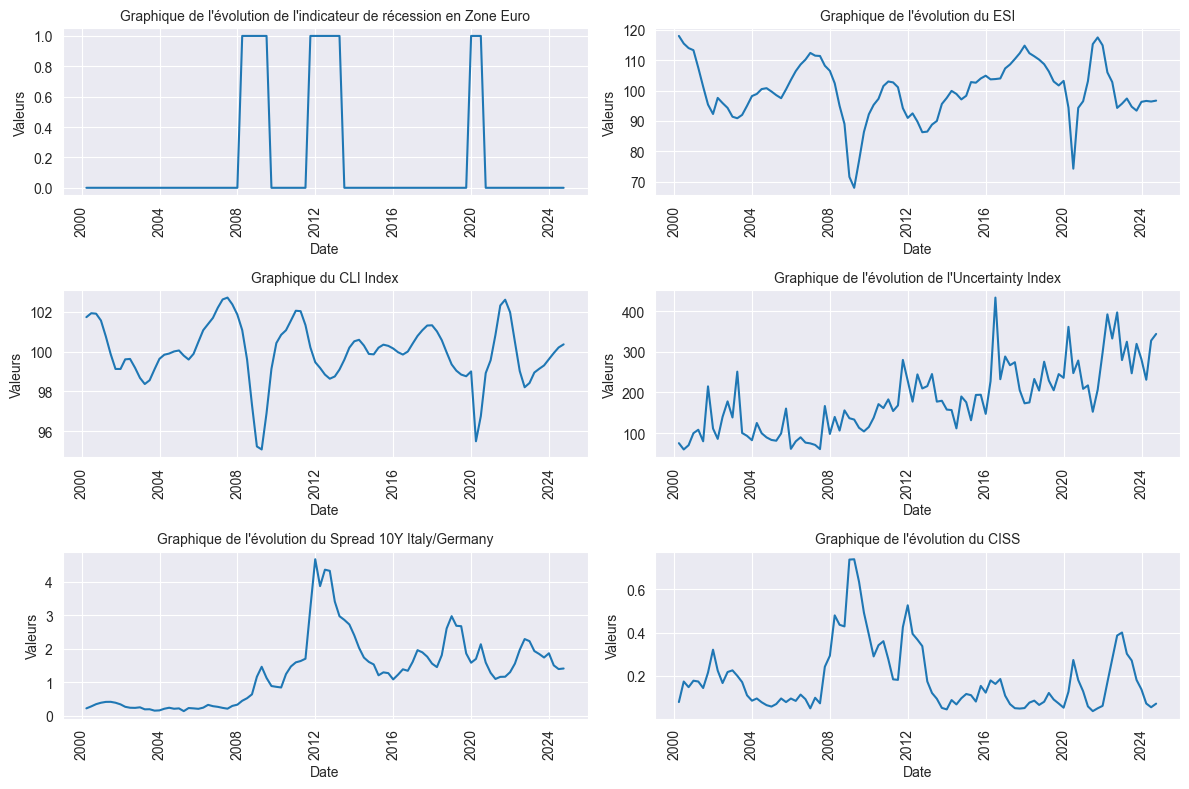

In [68]:
# Ajout d'un fond aux graphiques
sb.set_style("darkgrid")

# Creation d'une grille 3x2
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

# Liste des titres des graphiques
titles = ["Graphique de l'évolution de l'indicateur de récession en Zone Euro", "Graphique de l'évolution du ESI", 
          "Graphique du CLI Index", "Graphique de l'évolution de l'Uncertainty Index", 
          "Graphique de l'évolution du Spread 10Y Italy/Germany", "Graphique de l'évolution du CISS"]

# Boucle pour afficher les graphiques
for i, (ax, data, title) in enumerate(zip(axes.flatten(), dataListEU, titles)):
    # Enregistrement des données
    x = data.index
    y = data.values
    # Construction du graphique
    ax.plot(x, y)
    # Ajout de titres
    ax.set_xlabel("Date")
    ax.set_ylabel("Valeurs")
    ax.set_title(title, fontsize=10)
    ax.tick_params(axis='x', rotation=90)
# Affichage des graphiques
plt.tight_layout()
plt.show()

Les données sont toutes trimestrielles, couvrant chaque indicateur du **premier trimestre 1997 au troisième trimestre 2024**. Certaines semblent osciller autour de tendances, comme c’est le cas pour les Non-Farm Payrolls et l'Uncertainty Index. Plusieurs séries partagent une caractéristique commune : des **variations extrêmes**, avec de forts pics en **2000, 2008 et 2020**, correspondant respectivement **à la bulle internet, à la crise des subprimes et à la pandémie de Covid-19**. Une première visualisation nous donne un aperçu de la stationnarité de chaque série, qui sera ensuite analysée par des tests plus approfondis.

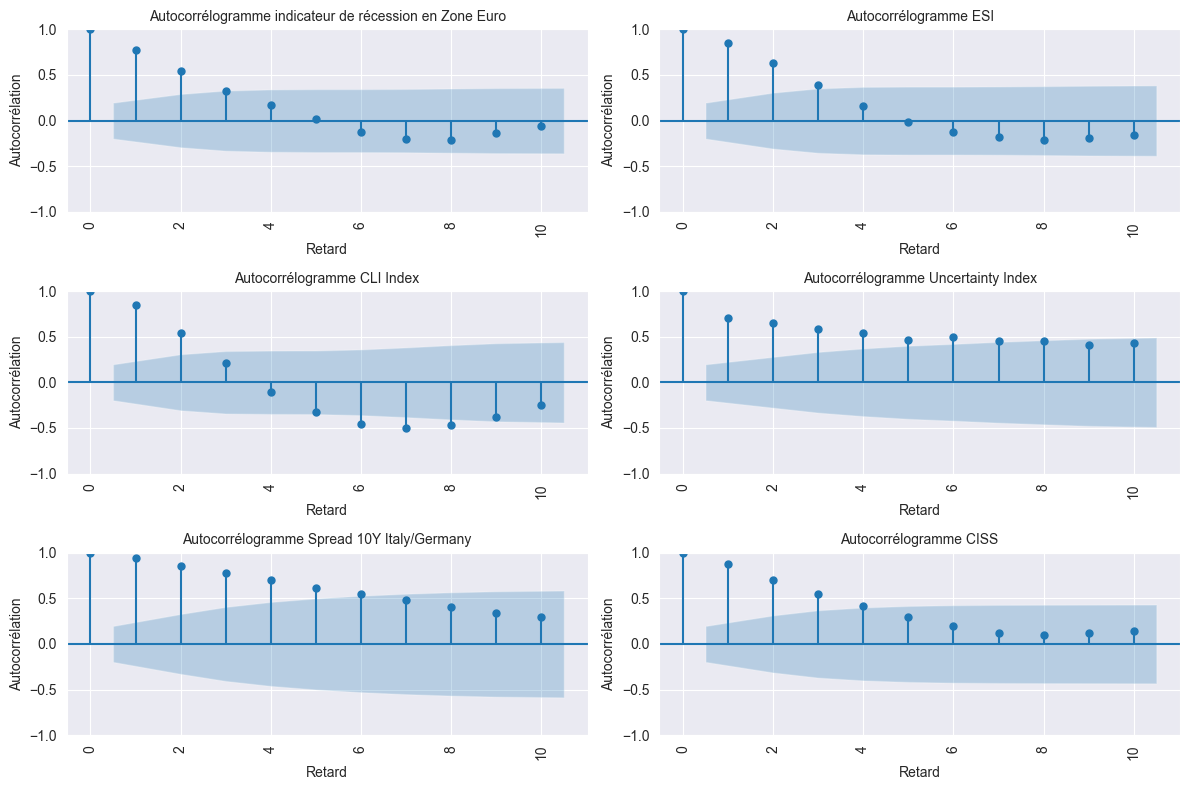

In [70]:
# Creation d'une grille 3x2
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

# Liste des titres des graphiques
titles = ["Autocorrélogramme indicateur de récession en Zone Euro", "Autocorrélogramme ESI", 
          "Autocorrélogramme CLI Index", "Autocorrélogramme Uncertainty Index", 
          "Autocorrélogramme Spread 10Y Italy/Germany", "Autocorrélogramme CISS"]

# Boucle pour afficher les graphiques
for i, (ax, data, title) in enumerate(zip(axes.flatten(), dataListEU, titles)):
    # Construction de l'autocorrélogramme
    plot_acf(data, lags=10, ax=ax)
    # Ajout de titres
    ax.set_xlabel("Retard")
    ax.set_ylabel("Autocorrélation")
    ax.set_title(title, fontsize=10)
    ax.tick_params(axis='x', rotation=90)
# Affichage des graphiques
plt.tight_layout()
plt.show()

La plupart des autocorrélations $\hat{ρ}$ (ACF) décroissent à des rythmes variés.

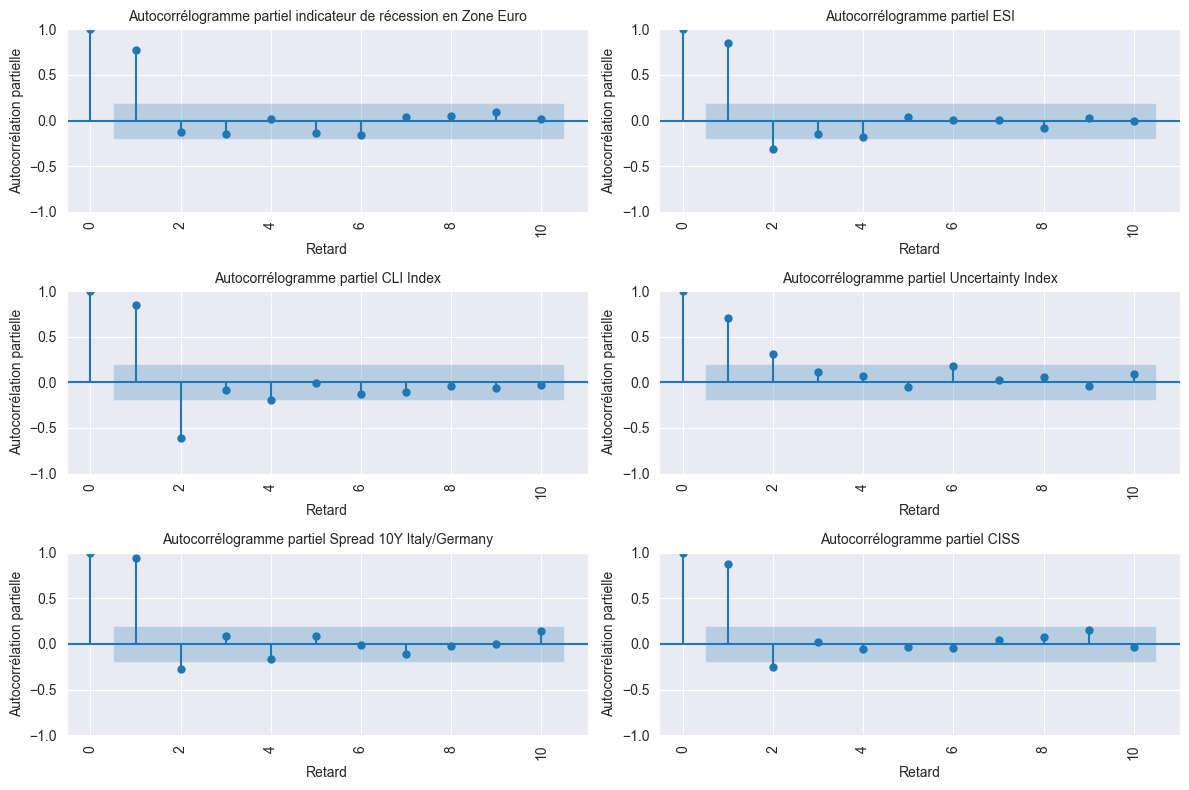

In [72]:
# Creation d'une grille 3x2
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

# Liste des titres des graphiques
titles = ["Autocorrélogramme partiel indicateur de récession en Zone Euro", "Autocorrélogramme partiel ESI", 
          "Autocorrélogramme partiel CLI Index", "Autocorrélogramme partiel Uncertainty Index", 
          "Autocorrélogramme partiel Spread 10Y Italy/Germany", "Autocorrélogramme partiel CISS"]

# Boucle pour afficher les graphiques
for i, (ax, data, title) in enumerate(zip(axes.flatten(), dataListEU, titles)):
    # Construction de l'autocorrélogramme partiel
    plot_pacf(data, lags=10, method="ywm", ax=ax)
    # Ajout de titres
    ax.set_xlabel("Retard")
    ax.set_ylabel("Autocorrélation partielle")
    ax.set_title(title, fontsize=10)
    ax.tick_params(axis='x', rotation=90)
# Affichage des graphiques
plt.tight_layout()
plt.show()

Les autocorrélations partielles $\hat{r}$ (PACF) sont **significatives pour les trois premiers ordres**. La première
autocorrélation $\hat{r}_1$ partielle est très proche de 1. **Au-delà du 3ème rang, elles sont très proches 0**.

# II - Stationnarité des variables explicatives
### II.1 - Test de racine unitaire : Stratégie de tests séquentielle avec ADF

**La variable à expliquer est, par construction, stationnaire**. Il s'agit d'une variable indicatrice qui prend deux valeurs : 1 en cas de récession, 0 sinon. Pour le reste des variables, nous réalisons le **test de Dickey-Fuller augmenté** sur chacune des variables. Le **nombre de retards optimal** sera sélectionné selon le **critère d’Akaike** et tous les autres paramètres sont laissés par défaut. Pour chaque variable, nous effectuons le test ADF selon 3 spécifications :
* Processus avec tendance déterministe et constante
* Processus avec constante (sans tendance déterministe)
* Processus sans tendance déterministe et sans constante

In [78]:
# Fonction pour afficher les résultats du test ADF
def display_adf_results(data, label, regression_type):
    result = adfuller(data, maxlag=None, regression=regression_type, autolag='AIC', store=False, regresults=False)
    print(f"Results for {label} :")
    print("-" * 40)
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("\n")

Pour chaque série, nous disposons de **99 observations**, les seuils critiques sont à chercher dans la **table de Dickey-Fuller** pour le modèle spécifié :
* Processus avec tendance déterministe et constante
| 𝛼      | 1%   | 5%   | 10%  |
|--------|------|------|------|
| N = 100| -4.04 | -3.45 | -3.15 |
* Processus avec constante (sans tendance déterministe)
| 𝛼      | 1%   | 5%   | 10%  |
|--------|------|------|------|
| N = 100| -3.51 | -2.89 | -2.58 |
* Processus sans tendance déterministe et sans constante
| 𝛼      | 1%   | 5%   | 10%  |
|--------|------|------|------|
| N = 100| -2.60 | -1.95 | -1.61 |

In [80]:
display_adf_results(esiDataEU, "ESI - Processus avec tendance déterministe et constante", 'ct')

Results for ESI - Processus avec tendance déterministe et constante :
----------------------------------------
ADF Statistic: -4.6448
p-value: 0.0009




La statistique de test $t_{ADF}$ est inférieure aux seuils critiques pour 𝛼 = 1%, 5% et 10% pour le premier processus donc nous rejetons l’hypothèse nulle de racine unitaire $𝐻_0: 𝜌 = 0$. **La série ESI est stationnaire** autour d'une tendance déterministe avec une constante. Il n'est pas nécessaire d'étudier les deux autres processus.

In [83]:
display_adf_results(cliDataEU, "CLI - Processus avec tendance déterministe et constante ", 'ct')

Results for CLI - Processus avec tendance déterministe et constante  :
----------------------------------------
ADF Statistic: -5.5946
p-value: 0.0000




La statistique de test $t_{ADF}$ est inférieure aux seuils critiques pour 𝛼 = 1%, 5% et 10% pour le premier processus donc nous rejetons l’hypothèse nulle de racine unitaire $𝐻_0: 𝜌 = 0$. **La série CLI est stationnaire** autour d'une tendance déterministe avec une constante. Il n'est pas nécessaire d'étudier les deux autres processus.

In [88]:
display_adf_results(uncertaintyDataEU, "Uncertainty - Processus avec tendance déterministe et constante ", 'ct')

Results for Uncertainty - Processus avec tendance déterministe et constante  :
----------------------------------------
ADF Statistic: -6.8684
p-value: 0.0000




La statistique de test $t_{ADF}$ est inférieure aux seuils critiques pour 𝛼 = 1%, 5% et 10% pour le premier processus donc nous rejetons l’hypothèse nulle de racine unitaire $𝐻_0: 𝜌 = 0$. **La série Uncertainty est stationnaire** autour d'une tendance déterministe avec une constante. Il n'est pas nécessaire d'étudier les deux autres processus.

In [91]:
display_adf_results(spreadDataEU, "Spread Italy/Germany - Processus avec tendance déterministe et constante ", 'ct')
display_adf_results(spreadDataEU, "Spread Italy/Germany - Processus avec constante (sans tendance déterministe)", 'c')
display_adf_results(spreadDataEU, "Spread Italy/Germany - Processus sans tendance déterministe et sans constante ", 'n')

Results for Spread Italy/Germany - Processus avec tendance déterministe et constante  :
----------------------------------------
ADF Statistic: -2.6099
p-value: 0.2754


Results for Spread Italy/Germany - Processus avec constante (sans tendance déterministe) :
----------------------------------------
ADF Statistic: -2.3008
p-value: 0.1717


Results for Spread Italy/Germany - Processus sans tendance déterministe et sans constante  :
----------------------------------------
ADF Statistic: -1.1590
p-value: 0.2247




La statistique de test $t_{ADF}$ est supérieure aux seuils critiques pour 𝛼 = 1% donc nous ne rejetons pas
l’hypothèse nulle de racine unitaire $𝐻_0: 𝜌 = 0$. **La série Italy/Germany est non-stationnaire**.

In [94]:
display_adf_results(stressDataEU, "Systemic Stress Index - Processus avec tendance déterministe et constante ", 'ct')
display_adf_results(stressDataEU, "Systemic Stress Index - Processus avec constante (sans tendance déterministe)", 'c')

Results for Systemic Stress Index - Processus avec tendance déterministe et constante  :
----------------------------------------
ADF Statistic: -3.1506
p-value: 0.0947


Results for Systemic Stress Index - Processus avec constante (sans tendance déterministe) :
----------------------------------------
ADF Statistic: -3.1084
p-value: 0.0259




La statistique de test $t_{ADF}$ est supérieure aux seuils critiques pour 𝛼 = 1% et 5% pour le premier processus, elle est inférieure au seuil à 5% pour le deuxième processus donc nous rejetons l’hypothèse nulle de racine unitaire $𝐻_0: 𝜌 = 0$. **La série Systemic Stress Index est stationnaire** avec une constante. Il n'est pas nécessaire d'étudier le troisième processus.

### II.2 - Stationnarisation des séries

Pour les séries non stationnaires, nous calculons leur **différence première** autant de fois que nécessaire pour les rendre **I(0)**. Cette opération réduit la taille de notre échantillon, donc nous tronquons également les séries déjà stationnaires afin qu’elles aient toutes les mêmes dimensions.

In [99]:
esiDataEUStationary = esiDataEU[1:]
cliDataEUStationary = cliDataEU[1:]
uncertaintyDataEUStationary = uncertaintyDataEU[1:]
spreadDataEUStationary = spreadDataEU.diff().dropna()
stressDataEUStationary = stressDataEU[1:]

# III - Modèle Probit : Indicateur de probabilité de récession
### III.1 - Construction du modèle

In [102]:
# Construction d'un nouveau DataFrame avec nos données stationnaires
X = pd.DataFrame({
    'ESI': esiDataEUStationary,
    'CLI': cliDataEUStationary,
    'Uncertainty' : uncertaintyDataEUStationary,
    'Spread' : spreadDataEUStationary,
    'Stress' : stressDataEUStationary})

# Ajout d'une constante à X puisque la fonction Probit n'en a pas par défaut
X = sm.add_constant(X)

# Variable dépendante
y = recessionDataEU[1:]

# Ajustement du modèle Probit
model = sm.Probit(y, X)
result = model.fit()
predictions = result.predict(X)
# Affichage des résultats du modèle
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.217870
         Iterations 8
                            Probit Regression Results                             
Dep. Variable:     Recession Indicator EU   No. Observations:                   98
Model:                             Probit   Df Residuals:                       92
Method:                               MLE   Df Model:                            5
Date:                    Thu, 02 Jan 2025   Pseudo R-squ.:                  0.5105
Time:                            18:55:27   Log-Likelihood:                -21.351
converged:                           True   LL-Null:                       -43.614
Covariance Type:                nonrobust   LLR p-value:                 1.811e-08
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          44.8511     25.288      1.774      0.076      -4.713      9

### III.2 - Affichage des résultats

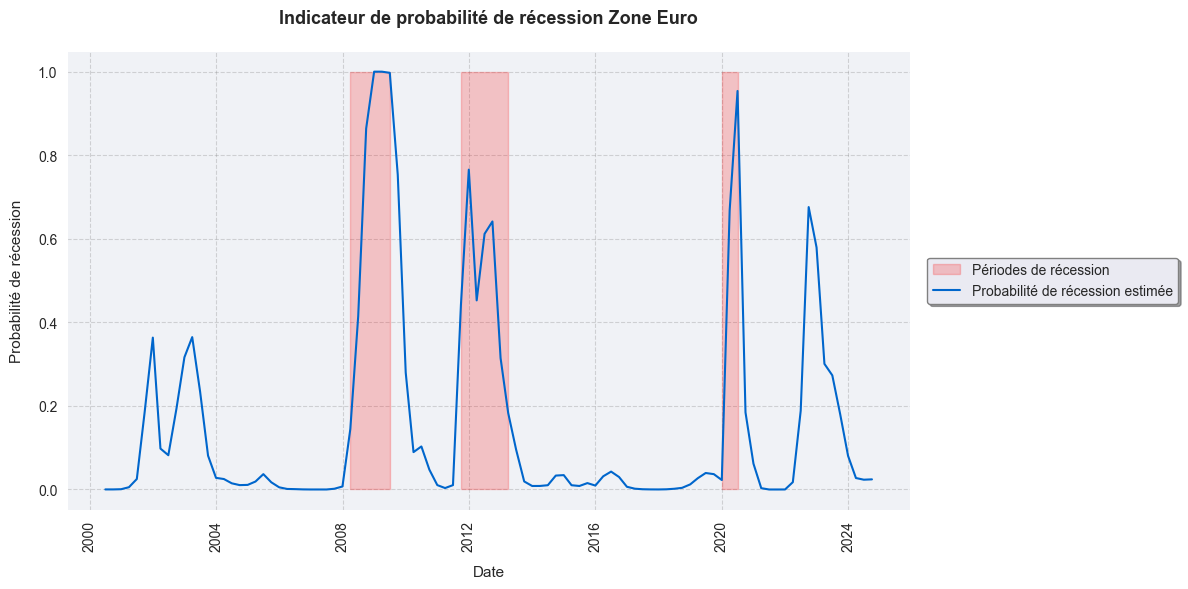

In [105]:
# Configuration du style
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

# Création de la figure avec des marges ajustées
fig, ax = plt.subplots(figsize=(12, 6))

# Affichage des périodes de récession
ax.fill_between(recessionDataEU[1:].index, 0, 1, where=(recessionDataEU[1:] == 1), 
                color='red', alpha=0.2, label='Périodes de récession')

# Ajout des probabilités de récession estimées
ax.plot(recessionDataEU[1:].index, predictions, 
        label='Probabilité de récession estimée', color='#0066CC', linewidth=1.5)

# Ajout de titres
ax.set_title('Indicateur de probabilité de récession Zone Euro', pad=20, fontsize=13, fontweight='bold')
ax.set_xlabel('Date', fontsize=11, labelpad=10)
ax.set_ylabel('Probabilité de récession', fontsize=11, labelpad=10)
ax.tick_params(axis='x', rotation=90)

# Ajout d'un fond
ax.set_facecolor('#F0F2F6')
ax.grid(True, linestyle='--', alpha=0.3, color='gray')

# Ajout d'une légende
ax.legend(bbox_to_anchor=(1.02, 0.5), loc="center left", borderaxespad=0, fontsize=10,
         frameon=True, fancybox=True, edgecolor='gray', shadow=True)

# Affichage du graphique
plt.tight_layout()
plt.show()

### III.3 - Prédictions du modèle pour 2025

In [108]:
warnings.filterwarnings('ignore', 'No frequency information was provided')

# Fonction réalisant des prévisions ARIMA pour chaque variable explicative
def forecast_variables(X, periods=4):
    forecasts = {}
    
    # Pour chaque variable (sauf la constante)
    for column in X.columns[1:]:
        # Ajustement du modèle ARIMA
        model = ARIMA(X[column], order=(1,0,1))
        results = model.fit()
        # Réalisation des prévisions
        forecast = results.forecast(steps=periods)
        forecasts[column] = forecast
    
    # Création d'un DataFrame avec les prévisions
    forecast_df = pd.DataFrame(forecasts)
    # Ajout de la constante
    forecast_df.insert(0, 'const', 1.0)
    
    return forecast_df

# Fonction utilisant les prévisions des variables explicatives pour prédire la probabilité de récession
def make_recession_predictions(probit_model, forecast_df):
    return probit_model.predict(forecast_df)

# Réalisation des prévisions pour les variables explicatives
forecast_X = forecast_variables(X, periods=4)

# Utilisation des prévisions dans le modèle Probit
recession_probabilities = make_recession_predictions(result, forecast_X)

# Création d'un DataFrame pour afficher les résultats
forecast_dates = pd.date_range(start=X.index[-1], periods=5, freq='Q')[1:]  # Ajustez selon vos dates
forecast_results = pd.DataFrame({'Recession_Probability': recession_probabilities})

# Affichage des résultats
print("\nPrévisions de probabilité de récession pour les 4 prochains trimestres :")
print(forecast_results)


Prévisions de probabilité de récession pour les 4 prochains trimestres :
            Recession_Probability
2024-12-31               0.025498
2025-03-31               0.029975
2025-06-30               0.033493
2025-09-30               0.036588


C:\Users\nnayr\AppData\Local\Temp\ipykernel_12408\1613199747.py:34: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_dates = pd.date_range(start=X.index[-1], periods=5, freq='Q')[1:]  # Ajustez selon vos dates


C:\Users\nnayr\AppData\Local\Temp\ipykernel_12408\899185501.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_value = predictions[-1]
C:\Users\nnayr\AppData\Local\Temp\ipykernel_12408\899185501.py:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_dates_new = pd.date_range(start=last_date, periods=5, freq='Q')


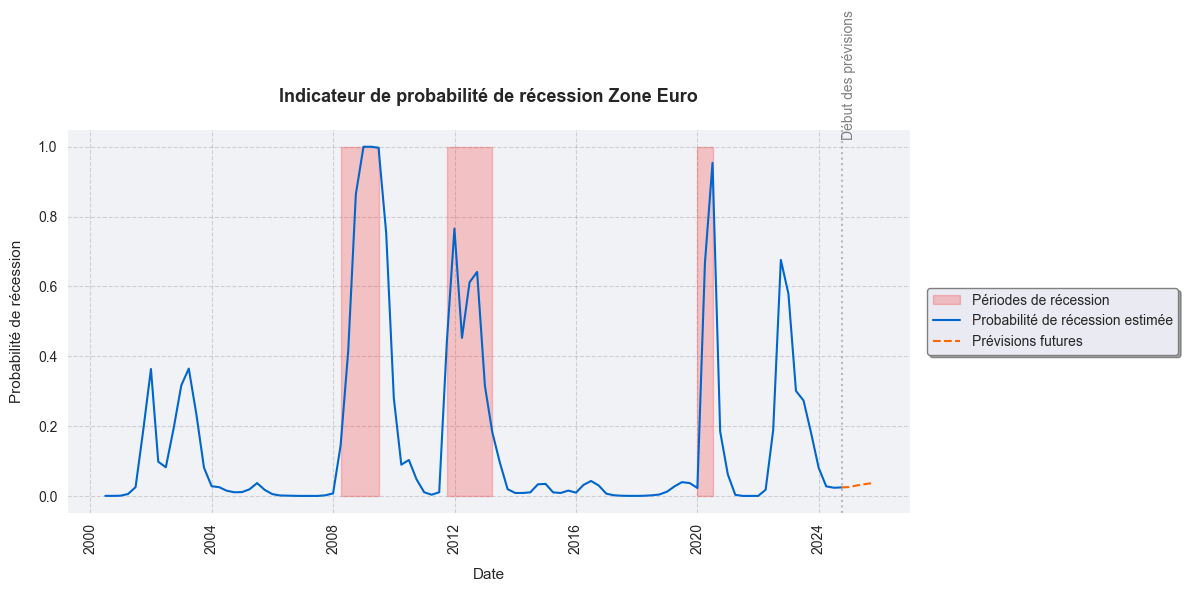

In [109]:
# Récupération de la dernière date et de la dernière valeur des prédictions historiques
last_date = recessionDataEU[1:].index[-1]
last_value = predictions[-1]

# Création du DataFrame pour les prévisions en commençant par le dernier point historique
forecast_dates_new = pd.date_range(start=last_date, periods=5, freq='Q')
forecast_results_new = np.concatenate(([last_value], recession_probabilities))

# Configuration du style
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

# Création de la figure avec des marges ajustées
fig, ax = plt.subplots(figsize=(12, 6))

# Affichage des périodes de récession
ax.fill_between(recessionDataEU[1:].index, 0, 1, where=(recessionDataEU[1:] == 1), 
                color='red', alpha=0.2, label='Périodes de récession')

# Ajout des probabilités de récession estimées
ax.plot(recessionDataEU[1:].index, predictions, 
        label='Probabilité de récession estimée', color='#0066CC', linewidth=1.5)

# Ajout des prévisions futures avec un style différent
ax.plot(forecast_dates_new, forecast_results_new, 
        label='Prévisions futures', color='#FF6600', linewidth=1.5, linestyle='--')

# Ajout d'une ligne verticale pour marquer le début des prévisions
ax.axvline(x=last_date, color='gray', linestyle=':', alpha=0.5)
ax.text(last_date, 1.02, 'Début des prévisions', 
        rotation=90, verticalalignment='bottom', color='gray')

# Ajout de titres
ax.set_title('Indicateur de probabilité de récession Zone Euro', pad=20, fontsize=13, fontweight='bold')
ax.set_xlabel('Date', fontsize=11, labelpad=10)
ax.set_ylabel('Probabilité de récession', fontsize=11, labelpad=10)
ax.tick_params(axis='x', rotation=90)

# Ajout d'un fond
ax.set_facecolor('#F0F2F6')
ax.grid(True, linestyle='--', alpha=0.3, color='gray')

# Ajout d'une légende
ax.legend(bbox_to_anchor=(1.02, 0.5), loc="center left", borderaxespad=0, fontsize=10,
          frameon=True, fancybox=True, edgecolor='gray', shadow=True)

# Affichage du graphique
plt.tight_layout()
plt.show()